In [86]:
import pandas as pd
import numpy as np
from numpy import inf
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
import os
os.chdir('/Users/KevinShao/Desktop/adsi_group2leftfeet')

In [3]:
df_train = pd.read_csv('data/raw/train.csv')

In [4]:
df_train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [5]:
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [6]:
#Feature engineering
df_train[df_train < 0] = 0

In [7]:
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.779250,18.576662,7.267088,2.807037,6.231212,44.608900,0.319238,0.948675,20.393713,...,1.947788,71.367488,1.077838,2.168500,3.245300,1.624513,0.648687,0.314050,1.257763,0.833625
std,2309.54541,17.113463,8.935263,4.318732,1.693373,3.584559,6.155453,0.307238,0.870167,14.602879,...,1.252352,10.418003,0.785670,1.392224,2.085154,1.355986,0.407626,0.622078,0.723270,0.372440
min,3799.00000,0.000000,2.900000,0.800000,0.300000,0.800000,21.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [8]:
#Drop this variable as its not needed
df_train.drop('Id', axis=1, inplace=True)

In [9]:
df_train.columns = df_train.columns.str.strip()

In [10]:
print(df_train['TARGET_5Yrs'].value_counts())

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64


In [11]:
#Extract the target variable in this case the target_5yrs
target = df_train.pop('TARGET_5Yrs')

In [12]:
#Get column names for feature importance or coefficient dataframe
columns = df_train.columns

In [13]:
#Normalizing the data as some might have % and other might have higher value such as GP and MIN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)

In [15]:
#Upsmapling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=8)
df_train, target = sm.fit_sample(df_train, target)
print(target.value_counts(), np.bincount(target))

0    6669
1    6669
Name: TARGET_5Yrs, dtype: int64 [6669 6669]


In [16]:
#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split (df_train, target, test_size=0.3, random_state=8, stratify=target)

In [17]:
print(y_train.value_counts())

0    4668
1    4668
Name: TARGET_5Yrs, dtype: int64


In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn import metrics

In [38]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [45]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [46]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.7458770614692654                                     
SCORE:                                                                            
0.7438780609695153                                                                
  2%|▏         | 2/100 [00:00<00:18,  5.18trial/s, best loss: -0.7458770614692654]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6601699150424788                                                                
SCORE:                                                                            
0.8430784607696152                                                                
  4%|▍         | 4/100 [00:00<00:17,  5.42trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.7391304347826086                                                                
  5%|▌         | 5/100 [00:00<00:17,  5.47trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.6756621689155422                                                                
SCORE:                                                                            
0.8300849575212393                                                                
  7%|▋         | 7/100 [00:01<00:17,  5.29trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.7586206896551724                                                                
  8%|▊         | 8/100 [00:01<00:17,  5.22trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.7496251874062968                                                                
SCORE:                                                                            
0.68015992003998                                                                  
 10%|█         | 10/100 [00:01<00:14,  6.02trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8428285857071465                                                                 
SCORE:                                                                             
0.7811094452773614                                                                 
 12%|█▏        | 12/100 [00:02<00:15,  5.57trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.679160419790105                                                                  
SCORE:                                                                             
0.7318840579710145                                                                 
 14%|█▍        | 14/100 [00:02<00:14,  5.77trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7413793103448276                                                                 
SCORE:                                                                             
0.7651174412793603                                                                 
 16%|█▌        | 16/100 [00:02<00:14,  5.80trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7268865567216392                                                                 
SCORE:                                                                             
0.6454272863568216                                                                 
 18%|█▊        | 18/100 [00:03<00:13,  6.30trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7066466766616691                                                                 
SCORE:                                                                             
0.7203898050974513                                                                 
 20%|██        | 20/100 [00:03<00:14,  5.69trial/s, best loss: -0.8430784607696152]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.844327836081959                                                                  
 21%|██        | 21/100 [00:03<00:15,  5.23trial/s, best loss: -0.844327836081959] 

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.7926036981509246                                                                
 22%|██▏       | 22/100 [00:03<00:14,  5.50trial/s, best loss: -0.844327836081959]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                            
0.8480759620189905                                                                
SCORE:                                                                             
 23%|██▎       | 23/100 [00:04<00:15,  5.04trial/s, best loss: -0.8480759620189905]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.8103448275862069                                                                 
 24%|██▍       | 24/100 [00:04<00:15,  4.78trial/s, best loss: -0.8480759620189905]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7841079460269865                                                                 
SCORE:                                                                             
0.8523238380809596                                                                 
 26%|██▌       | 26/100 [00:04<00:16,  4.41trial/s, best loss: -0.8523238380809596]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6731634182908546                                                                 
 27%|██▋       | 27/100 [00:05<00:15,  4.79trial/s, best loss: -0.8523238380809596]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8153423288355822                                                                 
SCORE:                                                                             
 28%|██▊       | 28/100 [00:05<00:16,  4.42trial/s, best loss: -0.8523238380809596]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.7906046976511744                                                                 
                                                                                   

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:
0.8418290854572713                                                                 
SCORE:                                                                             
0.7651174412793603                                                                 
 31%|███       | 31/100 [00:06<00:15,  4.47trial/s, best loss: -0.8523238380809596]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7478760619690155                                                                 
SCORE:                                                                             
0.7353823088455772                                                                 
 33%|███▎      | 33/100 [00:06<00:12,  5.25trial/s, best loss: -0.8523238380809596]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8580709645177411                                                                 
SCORE:                                                                             
0.7798600699650174                                                                 
 35%|███▌      | 35/100 [00:06<00:13,  4.91trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.703648175912044                                                                  
 36%|███▌      | 36/100 [00:06<00:12,  5.10trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7993503248375812                                                                 
 37%|███▋      | 37/100 [00:07<00:13,  4.67trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8430784607696152                                                                 
SCORE:                                                                             
0.7058970514742628                                                                 
 39%|███▉      | 39/100 [00:07<00:13,  4.67trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7341329335332334                                                                 
SCORE:                                                                             
0.6739130434782609                                                                 
 41%|████      | 41/100 [00:07<00:11,  5.32trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.848575712143928                                                                  
 42%|████▏     | 42/100 [00:08<00:11,  4.99trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7993503248375812                                                                 
SCORE:                                                                             
0.6874062968515742                                                                 
 44%|████▍     | 44/100 [00:08<00:11,  4.71trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6741629185407296                                                                 
SCORE:                                                                             
0.749375312343828                                                                  
 46%|████▌     | 46/100 [00:08<00:10,  5.14trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8390804597701149                                                                 
SCORE:                                                                             
0.8205897051474262                                                                 
 48%|████▊     | 48/100 [00:09<00:11,  4.54trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8243378310844578                                                                 
 49%|████▉     | 49/100 [00:09<00:11,  4.54trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7501249375312344                                                                 
 50%|█████     | 50/100 [00:09<00:10,  4.74trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.748375812093953                                                                  
 51%|█████     | 51/100 [00:10<00:10,  4.47trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7423788105947027                                                                 
 52%|█████▏    | 52/100 [00:10<00:09,  5.19trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.816591704147926                                                                  
SCORE:                                                                             
0.7348825587206397                                                                 
 54%|█████▍    | 54/100 [00:10<00:09,  4.85trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8473263368315842                                                                 
 55%|█████▌    | 55/100 [00:10<00:09,  4.69trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6479260369815092                                                                 
 56%|█████▌    | 56/100 [00:11<00:08,  5.11trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7271364317841079                                                                 
 57%|█████▋    | 57/100 [00:11<00:08,  4.84trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8238380809595203                                                                 
SCORE:                                                                             
0.7736131934032984                                                                 
 59%|█████▉    | 59/100 [00:11<00:09,  4.35trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
 59%|█████▉    | 59/100 [00:12<00:09,  4.35trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.856071964017991                                                                  
SCORE:                                                                             
0.6804097951024488                                                                 
 61%|██████    | 61/100 [00:12<00:08,  4.37trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8103448275862069                                                                 
 62%|██████▏   | 62/100 [00:12<00:08,  4.54trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7006496751624188                                                                 
 63%|██████▎   | 63/100 [00:12<00:08,  4.38trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8128435782108946                                                                 


/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:
0.763368315842079                                                                  
 65%|██████▌   | 65/100 [00:13<00:09,  3.61trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8545727136431784                                                                 
 66%|██████▌   | 66/100 [00:13<00:09,  3.58trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.855072463768116                                                                  


/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:
0.829335332333833                                                                  
SCORE:                                                                             
0.8203398300849575                                                                 
 69%|██████▉   | 69/100 [00:14<00:07,  3.88trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8445777111444278                                                                 
SCORE:                                                                             
 70%|███████   | 70/100 [00:14<00:07,  3.76trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.7958520739630185                                                                 
SCORE:                                                                             
0.8133433283358321                                                                 
 72%|███████▏  | 72/100 [00:15<00:06,  4.03trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8578210894552724                                                                 
 73%|███████▎  | 73/100 [00:15<00:06,  4.05trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.841079460269865                                                                  
 74%|███████▍  | 74/100 [00:15<00:06,  4.13trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7538730634682659                                                                 
 75%|███████▌  | 75/100 [00:15<00:05,  4.71trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8525737131434283                                                                 
SCORE:                                                                             
0.7738630684657671                                                                 
 77%|███████▋  | 77/100 [00:16<00:05,  4.58trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8035982008995503                                                                 
SCORE:                                                                             
0.8308345827086456                                                                 
 79%|███████▉  | 79/100 [00:16<00:04,  4.47trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7923538230884558                                                                 
 80%|████████  | 80/100 [00:16<00:04,  4.40trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6736631684157921                                                                 
 81%|████████  | 81/100 [00:17<00:04,  4.36trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7438780609695153                                                                 
 82%|████████▏ | 82/100 [00:17<00:04,  4.47trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8465767116441779                                                                 
SCORE:                                                                             
0.8175912043978011                                                                 
 84%|████████▍ | 84/100 [00:17<00:03,  4.28trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7703648175912043                                                                 
 85%|████████▌ | 85/100 [00:18<00:03,  4.39trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8363318340829585                                                                 
 86%|████████▌ | 86/100 [00:18<00:03,  3.96trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7198900549725138                                                                 
SCORE:                                                                             
0.7866066966516742                                                                 
 88%|████████▊ | 88/100 [00:18<00:03,  3.95trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8535732133933034                                                                 
 89%|████████▉ | 89/100 [00:19<00:02,  3.86trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8343328335832084                                                                 
SCORE:                                                                             
0.7501249375312344                                                                 
 91%|█████████ | 91/100 [00:19<00:02,  3.78trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8248375812093953                                                                 


/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:
0.8060969515242379                                                                 
SCORE:                                                                             
0.7528735632183908                                                                 
 94%|█████████▍| 94/100 [00:20<00:01,  4.19trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.7573713143428286                                                                 
SCORE:                                                                             
0.7531234382808596                                                                 
 96%|█████████▌| 96/100 [00:20<00:00,  4.48trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6849075462268865                                                                 
 97%|█████████▋| 97/100 [00:21<00:00,  4.40trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.6749125437281359                                                                 
 98%|█████████▊| 98/100 [00:21<00:00,  4.68trial/s, best loss: -0.8580709645177411]

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



SCORE:                                                                             
0.8463268365817092                                                                 
SCORE:                                                                             
0.8050974512743628                                                                 
100%|██████████| 100/100 [00:21<00:00,  4.58trial/s, best loss: -0.8580709645177411]


/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



In [47]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6135285820788642, 'gamma': 1.0915873467424873, 'max_depth': 14.0, 'min_child_weight': 10.0, 'reg_alpha': 40.0, 'reg_lambda': 0.8406464864298739}


In [48]:
xgb=XGBClassifier(n_estimators =180, max_depth = 14, gamma = 1.0915873467424873,
                    reg_alpha = 40,min_child_weight=10,
                    colsample_bytree=0.6135285820788642,reg_lambda=0.8406464864298739)

In [49]:
xgb.fit(X_train,y_train)

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:01:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6135285820788642,
              gamma=1.0915873467424873, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=14, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=40,
              reg_lambda=0.8406464864298739, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
from joblib import dump
dump(xgb,'models/xgb.joblib')

['models/xgb.joblib']

In [51]:
# make predictions for test data
y_pred_xgb = xgb.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2001
           1       0.81      0.93      0.86      2001

    accuracy                           0.85      4002
   macro avg       0.86      0.85      0.85      4002
weighted avg       0.86      0.85      0.85      4002



In [53]:
from sklearn import metrics
print("roc_auc:",metrics.accuracy_score(y_test, y_pred_xgb))

roc_auc: 0.8515742128935532


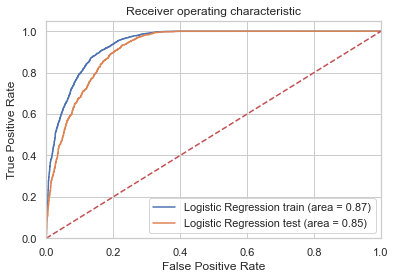

In [54]:
logit_roc_auc_test = roc_auc_score(y_test, xgb.predict(X_test))
logit_roc_auc_train = roc_auc_score(y_train, xgb.predict(X_train))
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, xgb.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression train (area = %0.2f)' % logit_roc_auc_train)
plt.plot(fpr_test, tpr_test, label='Logistic Regression test (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [78]:
df = pd.read_csv('data/raw/test.csv')

In [79]:
df[df < 0] = 0

In [80]:
df1=df.loc[:, df.columns != 'Id']

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [82]:
y_pred_sub = pd.DataFrame({'TARGET_5Yrs':xgb.predict(df1)})

In [83]:
df_out = pd.merge(df.iloc[:, 0], y_pred_sub, left_index = True, right_index = True)

In [84]:
df_out.to_csv(r'data/submission/submission_xgboost.csv', index = False)